# 兵王问题  - Support Vector Machine 案例
# 数据集 ../Datasets/krkopt.data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../Datasets/krkopt.data', header=None)
df.dropna(inplace=True)
df.head()

,0,1,2,3,4,5,6
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw


In [2]:
# 创建字母到数字的映射字典
letter_to_num = {chr(i): i-96 for i in range(97, 123)}  # a->1, b->2, ...

# 将字母转换为对应的数字    
df[0] = df[0].map(letter_to_num)
df[2] = df[2].map(letter_to_num)
df[4] = df[4].map(letter_to_num)
df.head()

,0,1,2,3,4,5,6
0,1,1,2,3,3,2,draw
1,1,1,3,1,3,2,draw
2,1,1,3,1,4,1,draw
3,1,1,3,1,4,2,draw
4,1,1,3,2,3,1,draw


In [3]:
# # 将标签列(第7列)转换为二分类标签
df.loc[df[6] != 'draw', 6] = -1
df.loc[df[6] == 'draw', 6] = 1
df[6] = df[6].astype('int64')

In [4]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [5]:
#拆分训练集 和 测试集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [6]:
# 使用StandardScaler进行归一化
from sklearn.preprocessing import StandardScaler
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)


In [7]:
# 使用SVM进行训练
from sklearn.svm import SVC

# 定义参数网格
param_grid = {
    'C': np.arange(0,110,10),
    'gamma': ['scale', 'auto', 0.1, 1],
}

# 创建网格搜索对象
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy'
)

# 在训练集上进行网格搜索
grid_search.fit(x_train, y_train)


# 输出最佳参数和得分
print("最佳参数:", grid_search.best_params_)
print("最佳交叉验证得分:", grid_search.best_score_)

# 使用最佳参数的模型在测试集上评估
best_model = grid_search.best_estimator_
y_predict = best_model.predict(x_test)
test_score = best_model.score(x_test, y_test)
print("测试集得分:", test_score)

/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 220.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constra

最佳参数: {'C': 10, 'gamma': 1}
最佳交叉验证得分: 0.9978139027631358
测试集得分: 0.9970059880239521


In [8]:
# 结果
print("结果：\n", y_test == y_predict)

结果：
 2980     True
22093    True
17481    True
10577    True
26670    True
         ... 
2338     True
3157     True
14712    True
17333    True
20785    True
Name: 6, Length: 7014, dtype: bool


Duplicate key in file PosixPath('/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc'), line 263 ('font.family:  sans-serif')
Duplicate key in file PosixPath('/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc'), line 271 ('font.sans-serif: DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Gen

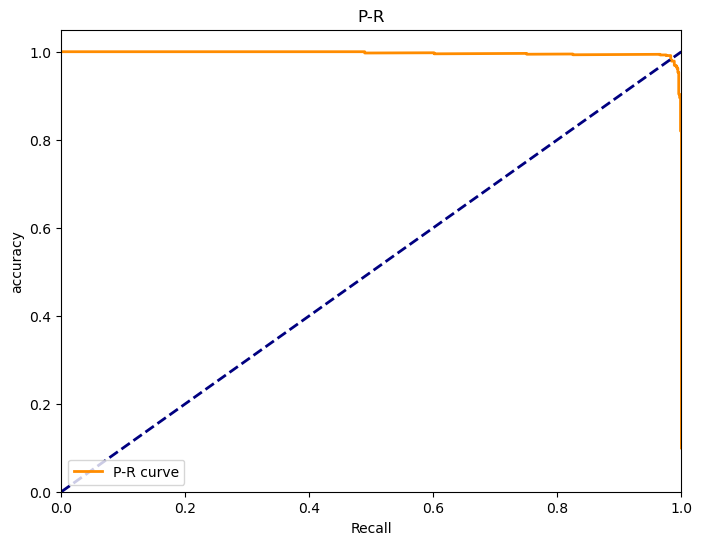

In [9]:
# 绘制P-R曲线
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
# 获取预测概率
y_pred_proba = best_model.decision_function(x_test)

# 计算精确率和召回率
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# 绘制P-R曲线
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='darkorange', lw=2, label='P-R curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('accuracy')
plt.title('P-R')
plt.legend(loc="lower left")
plt.show()


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following famil

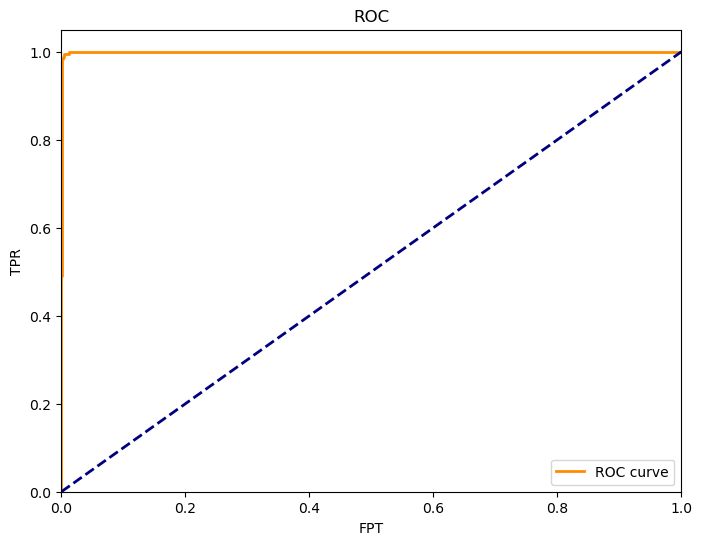

In [10]:
# 绘制ROC曲线
from sklearn.metrics import roc_curve


# 计算FPR和TPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 绘制ROC曲线
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPT')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()


In [11]:
# AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_predict)

0.9906793151589991

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following famil

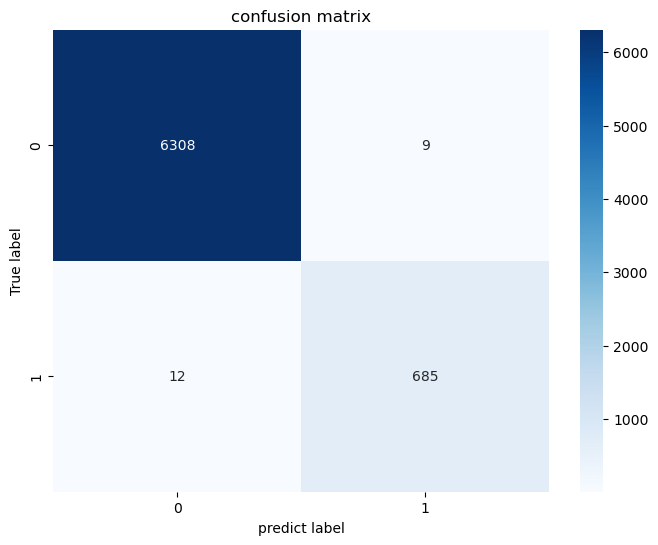

In [12]:
# 绘制混淆矩阵
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_predict)

# 绘制混淆矩阵热力图
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('predict label')
plt.ylabel('True label') 
plt.title('confusion matrix')
plt.show()
